# Network Community Detection

## Karate Club Problem

Network representation

In [1]:
from QHyper.problems.community_detection import KarateClubNetwork


karate_club_network = KarateClubNetwork

<class 'networkx.utils.decorators.argmap'> compilation 5:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


Louvain community detection algorithm (networkx impl.)

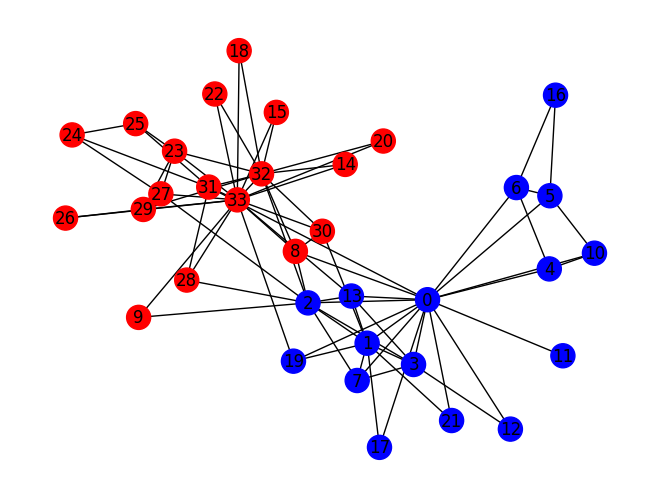

In [2]:
from networkx import community as nx_comm
import networkx as nx


lcda_communities = nx_comm.louvain_communities(
    karate_club_network.graph, seed=5345, resolution=0.5
)  # seed=None

color_map = []
for node in karate_club_network.graph:
    if node in lcda_communities[0]:
        color_map.append("blue")
    else:
        color_map.append("red")

nx.draw(karate_club_network.graph, node_color=color_map, with_labels=True)

### Create Community Detection Problem instance

In [4]:
from QHyper.problems.community_detection import CommunityDetectionProblem, ObjectiveFunctionFormula


karate_club_problem = CommunityDetectionProblem(
    karate_club_network, 2, ObjectiveFunctionFormula.SYMPY_EXPR
)
print(karate_club_problem.objective_function)

-0.0769230769230769*x0*x1 - 0.692307692307692*x0*x10 - 0.897435897435897*x0*x11 - 0.794871794871795*x0*x12 - 0.487179487179487*x0*x13 + 0.205128205128205*x0*x14 + 0.205128205128205*x0*x15 + 0.205128205128205*x0*x16 - 0.794871794871795*x0*x17 + 0.205128205128205*x0*x18 - 0.692307692307692*x0*x19 + 0.0256410256410255*x0*x2 + 0.205128205128205*x0*x20 - 0.794871794871795*x0*x21 + 0.205128205128205*x0*x22 + 0.512820512820513*x0*x23 + 0.307692307692308*x0*x24 + 0.307692307692308*x0*x25 + 0.205128205128205*x0*x26 + 0.41025641025641*x0*x27 + 0.307692307692308*x0*x28 + 0.41025641025641*x0*x29 - 0.384615384615385*x0*x3 + 0.41025641025641*x0*x30 - 0.384615384615385*x0*x31 + 1.23076923076923*x0*x32 + 1.74358974358974*x0*x33 - 0.692307692307692*x0*x4 - 0.58974358974359*x0*x5 - 0.58974358974359*x0*x6 - 0.58974358974359*x0*x7 - 0.487179487179487*x0*x8 + 0.205128205128205*x0*x9 + 0.173076923076923*x1*x10 + 0.0576923076923077*x1*x11 + 0.115384615384615*x1*x12 - 0.711538461538462*x1*x13 + 0.115384615384

In [5]:
from typing import cast

from sympy import Expr
from QHyper.hyperparameter_gen.parser import Expression


equation: Expr = cast(Expr, 0)
for i in karate_club_problem.G.nodes():
    for j in range(i + 1, len(karate_club_problem.G.nodes)):
        u_var, v_var = karate_club_problem.variables[i], karate_club_problem.variables[j]
        equation += u_var * v_var * karate_club_problem.B[i, j]
equation *= -1

objective_function = Expression(equation)

In [35]:
objective_function.as_dict()[('x0', 'x1')]
# type(objective_function.as_dict().keys())
type(list(objective_function.as_dict().items())[0][0][0])

str

In [7]:
from QHyper.util import VARIABLES


equation:dict [VARIABLES, float] = {}
for i in karate_club_problem.G.nodes:
    for j in range(i + 1,len(karate_club_problem.G.nodes)):
        u_var, v_var = karate_club_problem.variables[i], karate_club_problem.variables[j]
        equation[(u_var, v_var)] = karate_club_problem.B[i, j]
equation = {key: -1*val for key, val in equation.items()}

objective_function_dict = Expression(equation)

In [33]:
type(list(objective_function_dict.as_dict().items())[0][0][0])

sympy.core.symbol.Symbol

In [25]:
list(objective_function_dict.as_dict())[0][0]

x0

##### With DQM

##### dqm.solve() - use objective function as sympy expr. in converter.to_dqm

In [9]:
from QHyper.solvers.dqm import DQM


karate_dqm = DQM(karate_club_problem, time=5)
karate_sampleset_dqm = karate_dqm.solve()

x0 ['x1']
x0 ['x10']
x0 ['x11']
x0 ['x12']
x0 ['x13']
x0 ['x14']
x0 ['x15']
x0 ['x16']
x0 ['x17']
x0 ['x18']
x0 ['x19']
x0 ['x2']
x0 ['x20']
x0 ['x21']
x0 ['x22']
x0 ['x23']
x0 ['x24']
x0 ['x25']
x0 ['x26']
x0 ['x27']
x0 ['x28']
x0 ['x29']
x0 ['x3']
x0 ['x30']
x0 ['x31']
x0 ['x32']
x0 ['x33']
x0 ['x4']
x0 ['x5']
x0 ['x6']
x0 ['x7']
x0 ['x8']
x0 ['x9']
x1 ['x10']
x1 ['x11']
x1 ['x12']
x1 ['x13']
x1 ['x14']
x1 ['x15']
x1 ['x16']
x1 ['x17']
x1 ['x18']
x1 ['x19']
x1 ['x2']
x1 ['x20']
x1 ['x21']
x1 ['x22']
x1 ['x23']
x1 ['x24']
x1 ['x25']
x1 ['x26']
x1 ['x27']
x1 ['x28']
x1 ['x29']
x1 ['x3']
x1 ['x30']
x1 ['x31']
x1 ['x32']
x1 ['x33']
x1 ['x4']
x1 ['x5']
x1 ['x6']
x1 ['x7']
x1 ['x8']
x1 ['x9']
x10 ['x11']
x10 ['x12']
x10 ['x13']
x10 ['x14']
x10 ['x15']
x10 ['x16']
x10 ['x17']
x10 ['x18']
x10 ['x19']
x10 ['x2']
x10 ['x20']
x10 ['x21']
x10 ['x22']
x10 ['x23']
x10 ['x24']
x10 ['x25']
x10 ['x26']
x10 ['x27']
x10 ['x28']
x10 ['x29']
x10 ['x3']
x10 ['x30']
x10 ['x31']
x10 ['x32']
x10 ['x33']
x10 

In [15]:
karate_dqm_sample = karate_sampleset_dqm.first

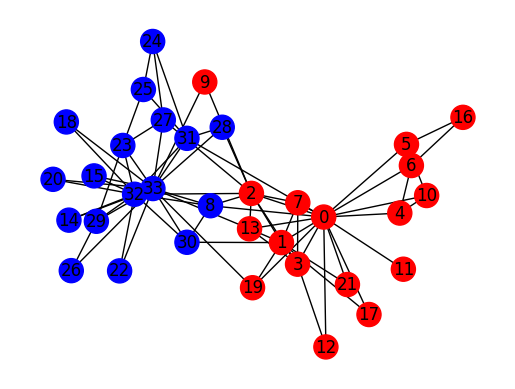

In [17]:
from QHyper.problems.network_communities.utils import draw_communities


folder = "./demo_output"
data_name = "karate_club"
path = f"{folder}/{data_name}.png"

draw_communities(karate_club_problem, karate_dqm_sample.sample, path)

Differences with Louvain algorithm

In [34]:
def communities_from_sample(sample, N_communities: int) -> set:
    communities = []
    for k in range(N_communities):
        comm = []
        for i in sample:
            if sample[i] == k:
                comm.append(i)
        communities.append(set(comm))

    return communities

In [35]:
karate_communities_dqm = communities_from_sample(karate_dqm_sample.sample, 2)

lcda_communities_xs = [
    {"x" + str(n) for n in cluster} for cluster in lcda_communities
]

print("\nLCDA")
print(f"comm. 0: {lcda_communities_xs[0]}")
print(f"comm. 1: {lcda_communities_xs[1]}")

print("\nDQM")
print(f"comm. 0: {karate_communities_dqm[0]}")
print(f"comm. 1: {karate_communities_dqm[1]}")

print("\nDiff.:")
# print(karate_communities_dqm[0].difference(lcda_communities_xs[0]))
print(karate_communities_dqm[1].difference(lcda_communities_xs[0]))


LCDA
comm. 0: {'x16', 'x10', 'x1', 'x11', 'x12', 'x6', 'x3', 'x21', 'x13', 'x7', 'x17', 'x0', 'x4', 'x19', 'x2', 'x5'}
comm. 1: {'x20', 'x23', 'x22', 'x9', 'x15', 'x14', 'x28', 'x29', 'x32', 'x25', 'x8', 'x33', 'x27', 'x31', 'x30', 'x26', 'x18', 'x24'}

DQM
comm. 0: {'x20', 'x23', 'x22', 'x15', 'x14', 'x28', 'x29', 'x32', 'x25', 'x8', 'x33', 'x27', 'x31', 'x30', 'x26', 'x18', 'x24'}
comm. 1: {'x9', 'x16', 'x10', 'x1', 'x11', 'x12', 'x6', 'x3', 'x21', 'x13', 'x7', 'x17', 'x0', 'x4', 'x19', 'x2', 'x5'}

Diff.:
{'x9'}


In [52]:
from QHyper.problems.network_communities.utils import ResultsFrame, draw_communities, draw_communities_from_graph


nodes = karate_club_problem.G.nodes
values = [
    list(karate_dqm_sample.sample.values()),
    ResultsFrame()
    .louvain_communities_to_sample_like(lcda_communities)
    .values(),
]
values = [values[0], [abs(1 - x) for x in values[1]]]

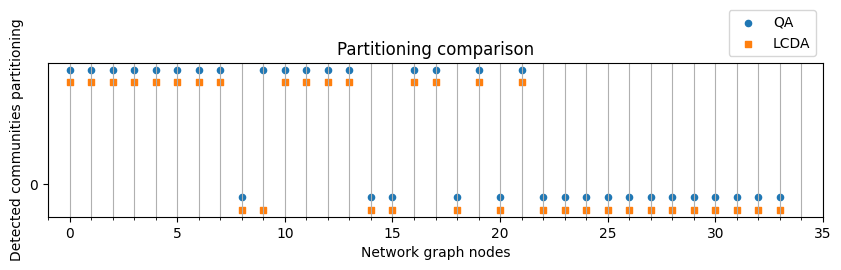

In [69]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


f, ax = plt.subplots(1, 1, figsize=(10, 2))

# Tickers
x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)

# Text annotations
ax.set_title("Partitioning comparison")
ax.set_xlabel("Network graph nodes")
ax.set_ylabel("Detected communities partitioning")

# Ticks, lims, tickers
ax.set_xticks([x for x in range(0, len(nodes) + 1, 5)])
ax.set_yticks(np.unique(values[0]).flatten())
ax.set_xlim(-1, len(nodes) + 1)
ax.xaxis.set_major_locator(x_major_ticker)
ax.xaxis.set_minor_locator(x_minor_ticker)
ax.grid(which="both", axis="x")

# Scatter
off_unit = 0.1
offsets = [off_unit * i for i in [1, 2]]
markers = ["o", "s"]
labels = ["QA", "LCDA"]
ss = [20, 20]

for i, vals in enumerate(values):
    offset, s, m, l = offsets[i], ss[i], markers[i], labels[i]
    ax.scatter(nodes, [v - offset for v in vals], s=s, marker=m, label=l)
ax.legend(loc=4, bbox_to_anchor=(1, 1));

#### dqm.solve_from_graph() - use graph iteration instead of sympy expr. in converter.to_dqm

In [70]:
karate_sampleset_from_graph = karate_dqm.solve_from_graph()

In [71]:
karate_sampleset_dqm_from_graph = karate_sampleset_from_graph.first

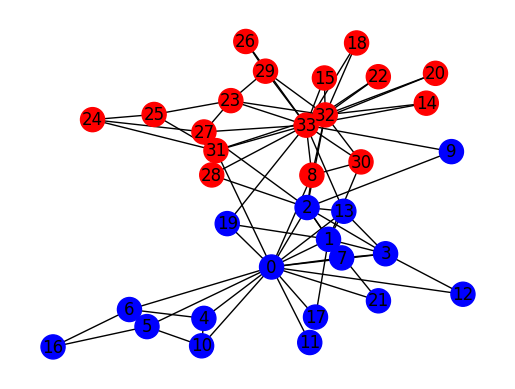

In [72]:
path = f"{folder}/{data_name}_dqm_from_graph.png"
draw_communities_from_graph(
    karate_club_problem, karate_sampleset_dqm_from_graph.sample, path
)

#### The same results obtained with .to_dqm() and .to_dqm_from_graph()

In [73]:
karate_communities_dqm_from_graph = communities_from_sample(
    karate_sampleset_dqm_from_graph.sample, 2
)

karate_communities_dqm_from_graph_xs = [
    {"x" + str(n) for n in cluster}
    for cluster in karate_communities_dqm_from_graph
]

print("\nDQM")
print(f"comm. 0: {karate_communities_dqm[0]}")
print(f"comm. 1: {karate_communities_dqm[1]}")

print("\nDQM from graph")
print(f"comm. 0: {karate_communities_dqm_from_graph_xs[0]}")
print(f"comm. 1: {karate_communities_dqm_from_graph_xs[1]}")

print("\nDiff.:")
print(
    karate_communities_dqm_from_graph_xs[1].difference(
        karate_communities_dqm[0]
    )
)
print("Same results")


DQM
comm. 0: {'x20', 'x23', 'x22', 'x15', 'x14', 'x28', 'x29', 'x32', 'x25', 'x8', 'x33', 'x27', 'x31', 'x30', 'x26', 'x18', 'x24'}
comm. 1: {'x9', 'x16', 'x10', 'x1', 'x11', 'x12', 'x6', 'x3', 'x21', 'x13', 'x7', 'x17', 'x0', 'x4', 'x19', 'x2', 'x5'}

DQM from graph
comm. 0: {'x9', 'x16', 'x10', 'x1', 'x11', 'x12', 'x6', 'x3', 'x21', 'x13', 'x7', 'x17', 'x0', 'x4', 'x19', 'x2', 'x5'}
comm. 1: {'x20', 'x23', 'x22', 'x15', 'x14', 'x28', 'x29', 'x32', 'x33', 'x8', 'x25', 'x27', 'x31', 'x30', 'x26', 'x18', 'x24'}

Diff.:
set()
Same results


### CQM

In [74]:
from QHyper.solvers.cqm import CQM


karate_cqm = CQM(karate_club_problem, time=5)
karate_cqm_sample = karate_cqm.solve()

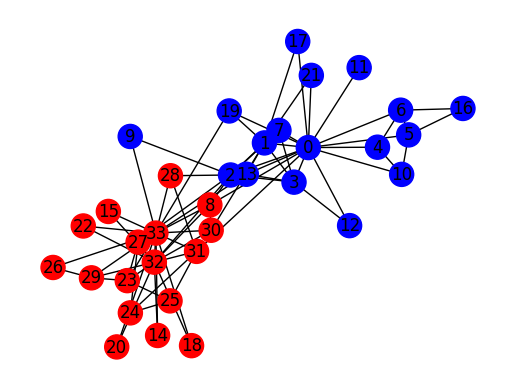

In [75]:
path = f"{folder}/{data_name}_cqm.png"
draw_communities(karate_club_problem, karate_cqm_sample, path)

Comparison with Louvain algorithm

In [76]:
karate_communities_cqm = communities_from_sample(karate_cqm_sample, 2)

lcda_communities_xs = [
    {"x" + str(n) for n in cluster} for cluster in lcda_communities
]

print("\nLCDA")
print(f"comm. 0: {lcda_communities_xs[0]}")
print(f"comm. 1: {lcda_communities_xs[1]}")

print("\nCQM")
print(f"comm. 0: {karate_communities_cqm[0]}")
print(f"comm. 1: {karate_communities_cqm[1]}")

print("\nDiff.:")
print(karate_communities_cqm[0].difference(lcda_communities_xs[0]))


LCDA
comm. 0: {'x16', 'x10', 'x1', 'x11', 'x12', 'x6', 'x3', 'x21', 'x13', 'x7', 'x17', 'x0', 'x4', 'x19', 'x2', 'x5'}
comm. 1: {'x20', 'x23', 'x22', 'x9', 'x15', 'x14', 'x28', 'x29', 'x32', 'x25', 'x8', 'x33', 'x27', 'x31', 'x30', 'x26', 'x18', 'x24'}

CQM
comm. 0: {'x9', 'x16', 'x12', 'x1', 'x11', 'x10', 'x6', 'x3', 'x21', 'x13', 'x7', 'x17', 'x0', 'x4', 'x19', 'x2', 'x5'}
comm. 1: {'x20', 'x23', 'x22', 'x15', 'x14', 'x28', 'x29', 'x32', 'x25', 'x33', 'x8', 'x27', 'x31', 'x30', 'x26', 'x18', 'x24'}

Diff.:
{'x9'}


The same results produced by DQM and CQM

In [79]:
print("\nDQM")
print(f"comm. 0: {karate_communities_dqm[0]}")
print(f"comm. 1: {karate_communities_dqm[1]}")

print("\nCQM")
print(f"comm. 0: {karate_communities_cqm[0]}")
print(f"comm. 1: {karate_communities_cqm[1]}")

print("\nDiff.:")
print(karate_communities_dqm[1].difference(karate_communities_cqm[0]))
print("Same results")


DQM
comm. 0: {'x20', 'x23', 'x22', 'x15', 'x14', 'x28', 'x29', 'x32', 'x25', 'x8', 'x33', 'x27', 'x31', 'x30', 'x26', 'x18', 'x24'}
comm. 1: {'x9', 'x16', 'x10', 'x1', 'x11', 'x12', 'x6', 'x3', 'x21', 'x13', 'x7', 'x17', 'x0', 'x4', 'x19', 'x2', 'x5'}

CQM
comm. 0: {'x9', 'x16', 'x12', 'x1', 'x11', 'x10', 'x6', 'x3', 'x21', 'x13', 'x7', 'x17', 'x0', 'x4', 'x19', 'x2', 'x5'}
comm. 1: {'x20', 'x23', 'x22', 'x15', 'x14', 'x28', 'x29', 'x32', 'x25', 'x33', 'x8', 'x27', 'x31', 'x30', 'x26', 'x18', 'x24'}

Diff.:
set()
Same results
